In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

In [3]:
jan= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\jan-tripdata.csv")
feb= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\feb-tripdata.csv")
march= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\march-tripdata.csv")
april= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\april-tripdata.csv")
may= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\may-tripdata.csv")
june= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\june-tripdata.csv")
july= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\july-tripdata.csv")
aug= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\august-tripdata.csv")
sep= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\sept-tripdata.csv")
octo= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\oct-tripdata.csv")
nov= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\nov-tripdata.csv")
dec= pd.read_csv(r"C:\Users\Atharva\google data analytics capstone project\dec-tripdata.csv")

In [5]:
#now lets merge all the dataframes into one 
data_frames = [jan, feb, march,april,may,june,july,aug,sep,octo,nov,dec]
data_df = pd.concat(data_frames)

In [6]:
data_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [7]:
data_df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [8]:
data_df["started_at"] = pd.to_datetime(data_df["started_at"])
data_df["ended_at"] = pd.to_datetime(data_df["ended_at"])

In [9]:
data_df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [10]:
# calculating the ride length 
data_df["ride_length"]= data_df["ended_at"] - data_df["started_at"]
data_df["ride_length"] # viewing the newly added column 

0        00:10:25
1        00:04:04
2        00:01:20
3        00:11:42
4        00:00:43
           ...   
247535   00:19:13
247536   00:07:01
247537   00:08:17
247538   00:14:13
247539   00:03:37
Name: ride_length, Length: 5595063, dtype: timedelta64[ns]

We can extract start date and start time from the same column. as we would like to know which days are having what number of trips per user type.

we would split the single column into two by using str.split function the function takes the character that you want to find and split e.g. it will be a space between the date and time in the field, n=1 means consider the first space found. For all this we first need to convert the format of the column to string inorder for the str.split function to work.

In [11]:
data_df[['start_date','start_time']] = data_df['started_at'].astype(str).str.split(' ',n=1,expand=True) 
# n =1 split at the first space

In [12]:
data_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,start_time
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,00:10:25,2021-01-23,16:14:19
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,00:04:04,2021-01-27,18:43:08
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,00:01:20,2021-01-21,22:35:54
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,00:11:42,2021-01-07,13:31:13
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,00:00:43,2021-01-23,02:24:02


In [15]:
data_df["start_time"] = pd.to_datetime(data_df["start_time"])
data_df["start_date"] = pd.to_datetime(data_df["start_date"])

In [16]:
data_df["week day"]=data_df["start_date"].apply(lambda x:x.weekday())
# takes a column and applies weekday function on it through lamba which is an anonymous function
data_df["week day"].unique() # show only unique values 

array([5, 2, 3, 0, 6, 4, 1], dtype=int64)

In [17]:
day_dict={0:"Sunday", 1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"saturday"}

In [18]:
data_df["weekday_name"]= data_df['week day'].apply(lambda y:day_dict[y])

In [19]:
data_df['year'] = pd.DatetimeIndex(data_df['start_date']).year
data_df['month']= pd.DatetimeIndex(data_df['start_date']).month
data_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,start_time,week day,weekday_name,year,month
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,00:10:25,2021-01-23,2022-09-17 16:14:19,5,Friday,2021,1
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,00:04:04,2021-01-27,2022-09-17 18:43:08,2,Tuesday,2021,1
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,00:01:20,2021-01-21,2022-09-17 22:35:54,3,Wednesday,2021,1
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,00:11:42,2021-01-07,2022-09-17 13:31:13,3,Wednesday,2021,1
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,00:00:43,2021-01-23,2022-09-17 02:24:02,5,Friday,2021,1


In [20]:
#sort the dataFrame by start date in ascending order 
data_df.sort_values(by=['start_date'],inplace= True, ascending=True )

In [21]:
data_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
ride_length                0
start_date                 0
start_time                 0
week day                   0
weekday_name               0
year                       0
month                      0
dtype: int64

In [22]:
data_df.duplicated().any()

False

lets find out the mean ride length of both groups of users such as member and casual

In [23]:
data_member = data_df[data_df["member_casual"]=="member"]
data_member_ride_len_mean = data_member["ride_length"].mean()
data_member_ride_len_mean

Timedelta('0 days 00:13:37.970452')

In [24]:
data_casual = data_df[data_df["member_casual"]=="casual"]
data_casual_ride_len_mean = data_casual["ride_length"].mean()
data_casual_ride_len_mean

Timedelta('0 days 00:32:00.056830')

In [25]:
data_member_ride_len_max = data_member["ride_length"].max()
data_member_ride_len_max

Timedelta('1 days 01:59:56')

In [26]:
data_casual_ride_len_max = data_casual["ride_length"].max()
data_casual_ride_len_max

Timedelta('38 days 20:24:09')

In [27]:
# calculate the mode of week day for memember which means to see what day do they usually ride on
data_member_ride_day_mode = data_member["week day"].mode()
data_member_ride_day_mode
# 2 is Tuesday

0    2
dtype: int64

In [28]:
data_member_ride_day_mode = data_casual["week day"].mode()
data_member_ride_day_mode
# 5 is friday

0    5
dtype: int64

In [29]:
mem_rides_pday= data_df[data_df["member_casual"]=="member"].groupby('week day')['ride_id'].count()
mem_rides_pday

week day
0    416212
1    465513
2    477192
3    451524
4    446428
5    433047
6    376142
Name: ride_id, dtype: int64

In [30]:
cas_rides_pday = data_df[data_df["member_casual"]=="casual"].groupby('week day')['ride_id'].count()
cas_rides_pday

week day
0    286376
1    274392
2    278950
3    286064
4    364080
5    558000
6    481143
Name: ride_id, dtype: int64

In [32]:
data_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,start_time,week day,weekday_name,year,month
65943,BC3CB970F08D36B6,electric_bike,2021-01-01 15:35:15,2021-01-01 15:44:46,Kingsbury St & Kinzie St,KA1503000043,Clark St & Elm St,TA1307000039,41.889106,-87.638383,41.902375,-87.631635,member,00:09:31,2021-01-01,2022-09-17 15:35:15,4,Thursday,2021,1
14763,5E125D8F1F7B1813,classic_bike,2021-01-01 14:26:46,2021-01-01 14:32:16,Columbus Dr & Randolph St,13263,New St & Illinois St,TA1306000013,41.884728,-87.619521,41.890847,-87.618617,member,00:05:30,2021-01-01,2022-09-17 14:26:46,4,Thursday,2021,1
58467,15ACCC355D076101,classic_bike,2021-01-01 20:02:09,2021-01-01 20:39:53,Fairbanks Ct & Grand Ave,TA1305000003,Field Blvd & South Water St,15534,41.891847,-87.620580,41.886349,-87.617517,member,00:37:44,2021-01-01,2022-09-17 20:02:09,4,Thursday,2021,1
12687,90EBA06FDFD44CFE,classic_bike,2021-01-01 13:12:14,2021-01-01 13:17:09,Federal St & Polk St,SL-008,Franklin St & Jackson Blvd,TA1305000025,41.872078,-87.629544,41.877708,-87.635321,member,00:04:55,2021-01-01,2022-09-17 13:12:14,4,Thursday,2021,1
22135,CBF551444E1D77B8,classic_bike,2021-01-01 16:47:56,2021-01-01 16:52:02,Paulina St & Howard St,515,Greenview Ave & Jarvis Ave,520,42.019159,-87.673573,42.015962,-87.668570,member,00:04:06,2021-01-01,2022-09-17 16:47:56,4,Thursday,2021,1


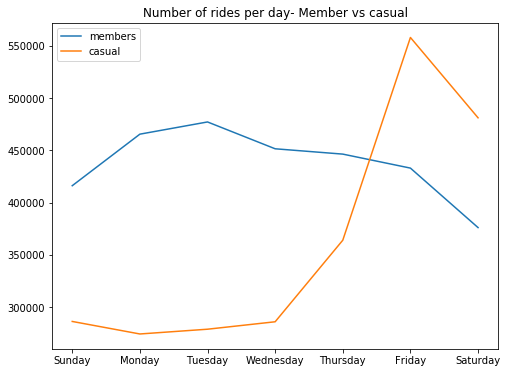

In [36]:
plt.figure(figsize=(8,6))
plt.plot(mem_rides_pday) # gets average ride length in minutes 
plt.plot(cas_rides_pday)
plt.title("Number of rides per day- Member vs casual")
plt.legend(["members","casual"])
labels=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.xticks(mem_rides_pday.index,labels)
plt.show()

It confirms from the above plot what we already found out that the member users tend to use rides on the week days where as the casual members are riding more on the weekends.

In [38]:
member_type =data_df["member_casual"].value_counts()
member_type

member    3066058
casual    2529005
Name: member_casual, dtype: int64

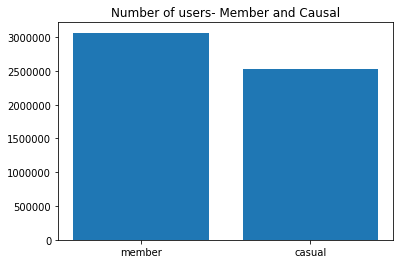

In [39]:
plt.title("Number of users- Member and Causal")
plt.bar(member_type.index, member_type.values)
plt.ticklabel_format(style='plain', axis='y')

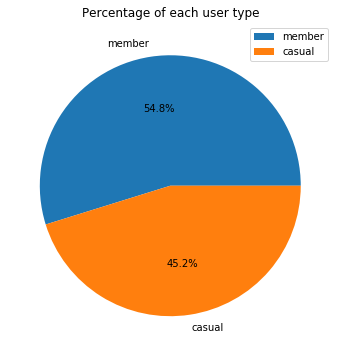

In [40]:
# pie chart  to see the percentage
plt.figure(figsize=(8,6))
plt.pie(member_type.values, labels =member_type.index,autopct='%1.1f%%')
plt.title("Percentage of each user type")
plt.legend(member_type.index)
plt.show()

In [41]:
#To check monthly trends in the users
monthly_users = data_df.groupby("month") ['member_casual'].value_counts()
monthly_users

month  member_casual
1      member            78717
       casual            18117
2      member            39491
       casual            10131
3      member           144463
       casual            84033
4      member           200629
       casual           136601
5      member           274717
       casual           256916
6      casual           370681
       member           358914
7      casual           442056
       member           380354
8      casual           412671
       member           391681
9      member           392257
       casual           363890
10     member           373984
       casual           257242
11     member           253049
       casual           106929
12     member           177802
       casual            69738
Name: member_casual, dtype: int64

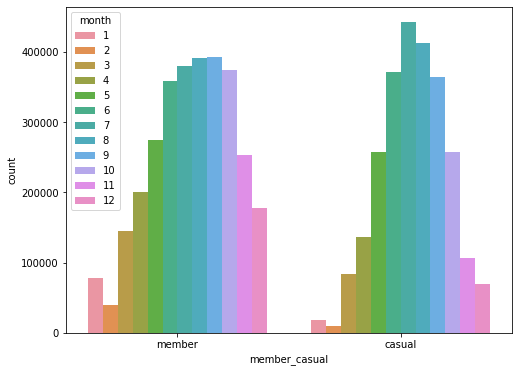

In [43]:
plt.figure(figsize=(8,6))

sns.countplot(x="member_casual",hue="month", data=data_df)

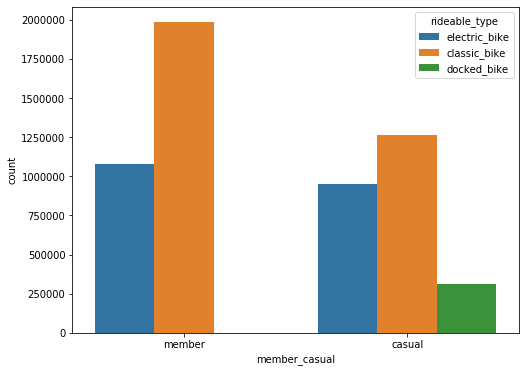

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x="member_casual", hue="rideable_type", data=data_df)
plt.ticklabel_format(style='plain', axis='y') # for removing #scientific notation